## Data exploration January 2018

**GOAL**: Explore how data is structured, see how null data is being input, check the quality of our data is OK.

## STRUCTURE OF THIS NOTEBOOK

- Explore January data from the year 2018


In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from pathlib import Path


In [477]:
path = '/home/carleondel/data-madrid_pollution_project/'
df_ene = pd.read_csv(path + 'ene_mo18.csv', sep = ';')

Let's start exploring our data from January

In [478]:
df_ene.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2018,1,1,1.0,V,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,79,4,1,28079004_1_38,2018,1,2,1.0,V,...,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V
2,28,79,4,1,28079004_1_38,2018,1,3,1.0,V,...,2.0,V,2.0,V,2.0,V,3.0,V,2.0,V
3,28,79,4,1,28079004_1_38,2018,1,4,2.0,V,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2018,1,5,1.0,V,...,2.0,V,2.0,V,2.0,V,1.0,V,2.0,V


### **Datos horarios y en tiempo real:**

- Cada registro está estructurado de la siguiente forma: PROVINCIA MUNICIPIO ESTACION MAGNITUD PUNTO_MUESTREO ANO MES DIA H01 V01 H02 V02
28 79 4 1 28079004_1_38 2019 1 1 23 V 17 V

- El campo punto de muestreo incluye el código de la estación completo
(provincia, municipio y estación) más la magnitud y la técnica de
muestreo.

- H01 corresponde al dato de la 1 de la mañana de ese día, V01 es el
código de validación, H02 al de las 2 de la mañana, V02 y así
sucesivamente.
- UNICAMENTE SON VÁLIDOS LOS DATOS QUE LLEVAN EL CÓDIGO DE VALIDACIÓN
“V".


In [479]:
df_ene.columns

Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'DIA', 'H01', 'V01', 'H02', 'V02', 'H03', 'V03', 'H04',
       'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07', 'H08', 'V08', 'H09',
       'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12', 'H13', 'V13', 'H14',
       'V14', 'H15', 'V15', 'H16', 'V16', 'H17', 'V17', 'H18', 'V18', 'H19',
       'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22', 'H23', 'V23', 'H24',
       'V24'],
      dtype='object')

The first thing we need to do is to filter our data to only keep the NO2 levels, which are stored as MAGNITUD = 08

In [480]:
df_ene.MAGNITUD.nunique()

14

In [481]:
df_ene.MAGNITUD.unique()

array([ 1,  6,  7,  8, 12,  9, 10, 14, 20, 30, 35, 42, 43, 44])

In [482]:
# We filter by NO2 levels and drop the column
df_ene_NO2 = df_ene[df_ene['MAGNITUD'] == 8]
df_ene_NO2 = df_ene_NO2.drop('MAGNITUD', axis = 1)

In [483]:
df_ene_NO2.head()

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
93,28,79,4,28079004_8_8,2018,1,1,15.0,V,35.0,...,39.0,V,35.0,V,27.0,V,23.0,V,11.0,V
94,28,79,4,28079004_8_8,2018,1,2,13.0,V,17.0,...,38.0,V,41.0,V,47.0,V,55.0,V,47.0,V
95,28,79,4,28079004_8_8,2018,1,3,35.0,V,17.0,...,53.0,V,47.0,V,51.0,V,56.0,V,41.0,V
96,28,79,4,28079004_8_8,2018,1,4,35.0,V,34.0,...,42.0,V,36.0,V,35.0,V,34.0,V,28.0,V
97,28,79,4,28079004_8_8,2018,1,5,24.0,V,17.0,...,53.0,V,54.0,V,52.0,V,46.0,V,44.0,V


In [484]:
print(f"We have kept {100*len(df_ene_NO2) / len(df_ene):.2f} % of the original dataset")

We have kept 15.93 % of the original dataset


In [485]:
df_ene_NO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 93 to 4575
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       744 non-null    int64  
 1   MUNICIPIO       744 non-null    int64  
 2   ESTACION        744 non-null    int64  
 3   PUNTO_MUESTREO  744 non-null    object 
 4   ANO             744 non-null    int64  
 5   MES             744 non-null    int64  
 6   DIA             744 non-null    int64  
 7   H01             744 non-null    float64
 8   V01             744 non-null    object 
 9   H02             744 non-null    float64
 10  V02             744 non-null    object 
 11  H03             744 non-null    float64
 12  V03             744 non-null    object 
 13  H04             744 non-null    float64
 14  V04             744 non-null    object 
 15  H05             744 non-null    float64
 16  V05             744 non-null    object 
 17  H06             744 non-null    float6

In [486]:
df_ene_NO2.nunique()

PROVINCIA           1
MUNICIPIO           1
ESTACION           24
PUNTO_MUESTREO     24
ANO                 1
MES                 1
DIA                31
H01               117
V01                 1
H02               109
V02                 1
H03                98
V03                 1
H04                91
V04                 2
H05                85
V05                 2
H06                83
V06                 2
H07                85
V07                 2
H08               107
V08                 2
H09               132
V09                 2
H10               130
V10                 2
H11               118
V11                 2
H12               113
V12                 2
H13               107
V13                 2
H14               102
V14                 2
H15                95
V15                 2
H16                96
V16                 2
H17                97
V17                 2
H18               106
V18                 2
H19               137
V19                 2
H20       

So we are working with data from 24 different stations

Now we should filter by deleting/interpolating the values of H_X when V_X is 'N'. But before choosing how to input these data, we are going to analyze how many hour values have a Not valid measure. And also check what values are being input. If those values are a interpolation of the other measurements, we could consider keeping those.

In [487]:
# What values do we have
df_ene_NO2.V04.unique()

array(['V', 'N'], dtype=object)

In [488]:
# Create a list with values [V01, V02,...,V24]
V_cols = ['V{:02d}'.format(i) for i in range(1, 25)]

print(V_cols)

['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']


In [489]:
# Count the times 'N' appears each hour
count_N_values = df_ene_NO2[V_cols].apply(lambda x: x.map({'N' : 1, 'V' : 0})).sum()

# Mostrar los resultados
print(count_N_values)

V01     0
V02     0
V03     0
V04     1
V05     2
V06     1
V07     1
V08     1
V09     4
V10     9
V11     6
V12    11
V13     5
V14     6
V15     3
V16     2
V17     4
V18     3
V19     3
V20     2
V21     1
V22     0
V23     0
V24     0
dtype: int64


In [490]:
100*11 / len(df_ene_NO2.V12)

1.478494623655914

Let's check our data in hour 12

In [491]:
df_ene_NO2[df_ene_NO2['V12'] == 'N'][['H12', 'V12']]

,H12,V12
108,82.0,N
249,61.0,N
262,71.0,N
1182,65.0,N
1865,50.0,N
2062,95.0,N
2237,59.0,N
2240,45.0,N
3104,79.0,N
3551,58.0,N


We should now see how our invalid data changes when compared to the valid data. If it doesn't change much we can consider keeping it. We must otherwise decide how to input those values

## DATA QUALITY

### First approach
- Group by stations to see if we should drop any station
Our first approach (and a good practice when using metereological data) is to group by stations and discard the data coming from the ones that have >10% of missing data

In [492]:
V_cols = ['V{:02d}'.format(i) for i in range(1, 25)]

In [493]:
# Convertir 'N' a 1 y otros valores a 0 en las columnas especificadas
df_ene_NO2[V_cols] = df_ene_NO2[V_cols].apply(lambda x: x.map({'N': 1, 'V': 0}))

In [494]:
df_ene_NO2.head()

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
93,28,79,4,28079004_8_8,2018,1,1,15.0,0,35.0,...,39.0,0,35.0,0,27.0,0,23.0,0,11.0,0
94,28,79,4,28079004_8_8,2018,1,2,13.0,0,17.0,...,38.0,0,41.0,0,47.0,0,55.0,0,47.0,0
95,28,79,4,28079004_8_8,2018,1,3,35.0,0,17.0,...,53.0,0,47.0,0,51.0,0,56.0,0,41.0,0
96,28,79,4,28079004_8_8,2018,1,4,35.0,0,34.0,...,42.0,0,36.0,0,35.0,0,34.0,0,28.0,0
97,28,79,4,28079004_8_8,2018,1,5,24.0,0,17.0,...,53.0,0,54.0,0,52.0,0,46.0,0,44.0,0


In [495]:
# Calcular el total de datos no válidos por estación
total_invalid_data = df_ene_NO2.groupby('ESTACION')[V_cols].sum()

In [496]:
total_invalid_data 

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
ESTACION,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0


In [497]:
# Calcular el total de datos por estación
total_data_per_station = df_ene_NO2.groupby('ESTACION')[V_cols].count()

In [498]:
total_data_per_station

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
ESTACION,,,,,,,,,,,,,,,,,,,,,
4,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
11,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
16,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
17,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
18,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
24,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
27,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
35,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [499]:
# Calcular el porcentaje de datos no válidos
percentage_invalid_data = round((total_invalid_data / total_data_per_station) * 100, 2)

# Mostrar el resultado
print(percentage_invalid_data)

          V01  V02  V03   V04   V05   V06   V07   V08   V09   V10  ...   V15  \
ESTACION                                                           ...         
4         0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
8         0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
11        0.0  0.0  0.0  3.23  3.23  0.00  0.00  0.00  0.00  0.00  ...  0.00   
16        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
17        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
18        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
24        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
27        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
35        0.0  0.0  0.0  0.00  0.00  0.00  0.00  0.00  3.23  3.23  ...  3.23   
36        0.0  0.0  0.0  0.00  3.23  3.23  3.23  3.23  3.23  3.23  ...  0.00   
38        0.0  0.0  0.0  0.00  0.00  0.0

In [500]:
# Filter by stations with > 10% missing data for any hour
filtered_percentage_data = percentage_invalid_data[percentage_invalid_data > 0]


filtered_percentage_data[
    (filtered_percentage_data[V_cols] > 10).any(axis=1)
]

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
ESTACION,,,,,,,,,,,,,,,,,,,,,


In [501]:
# Filtrar las estaciones que tienen algún valor > 6%
filtered_percentage_data[
    (filtered_percentage_data[V_cols] > 6).any(axis=1)
]

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
ESTACION,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.45,3.23,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,3.23,3.23,3.23,3.23,3.23,3.23,...,NaN,NaN,3.23,NaN,NaN,3.23,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.45,...,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Insights
- There are no problems related to the measurement stations. We have less than 7% of missing data for any hour.
- We won't consider dropping any stations

Since our measurement stations have as much less than 7% of missing data, we won't rop any station.
We must decide between dropping the rows or inputing the values with estimations

### Second approach

Let's group by days and see if we have problems at some specific days. Since we have one row for each day, we will create a new feature containing the sum of 'N' values in our 'V columns'

In [502]:
df_ene_NO2.head()

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
93,28,79,4,28079004_8_8,2018,1,1,15.0,0,35.0,...,39.0,0,35.0,0,27.0,0,23.0,0,11.0,0
94,28,79,4,28079004_8_8,2018,1,2,13.0,0,17.0,...,38.0,0,41.0,0,47.0,0,55.0,0,47.0,0
95,28,79,4,28079004_8_8,2018,1,3,35.0,0,17.0,...,53.0,0,47.0,0,51.0,0,56.0,0,41.0,0
96,28,79,4,28079004_8_8,2018,1,4,35.0,0,34.0,...,42.0,0,36.0,0,35.0,0,34.0,0,28.0,0
97,28,79,4,28079004_8_8,2018,1,5,24.0,0,17.0,...,53.0,0,54.0,0,52.0,0,46.0,0,44.0,0


In [503]:
# Calculate the sum of 'V01' to 'V24' for each row
df_ene_NO2['sum_V01_to_V24'] = df_ene_NO2[V_cols].sum(axis=1)

# Filter rows where the sum is greater than 3
df_ene_NO2[df_ene_NO2['sum_V01_to_V24'] > 3]


,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,sum_V01_to_V24
2240,28,79,36,28079036_8_8,2018,1,21,37.0,0,33.0,...,0,99.0,0,93.0,0,79.0,0,52.0,0,8
2679,28,79,39,28079039_8_8,2018,1,26,13.0,0,3.0,...,1,24.0,1,19.0,0,12.0,0,8.0,0,4


In [504]:
df_ene_NO2.loc[2240]

PROVINCIA                   28
MUNICIPIO                   79
ESTACION                    36
PUNTO_MUESTREO    28079036_8_8
ANO                       2018
MES                          1
DIA                         21
H01                       37.0
V01                          0
H02                       33.0
V02                          0
H03                       40.0
V03                          0
H04                       45.0
V04                          0
H05                       12.0
V05                          1
H06                        0.0
V06                          1
H07                        0.0
V07                          1
H08                        0.0
V08                          1
H09                        0.0
V09                          1
H10                        0.0
V10                          1
H11                        0.0
V11                          1
H12                       45.0
V12                          1
H13                       53.0
V13     

### Insights
Overall our data quality is OK. After grouping by days and stations, we only have 2 / 744 rows (day and station) with more than 3 (10%) of not valid data.
- When our hourly data (H_cols) is flagged as not valid, the value is being input as a 0. This could be problematic, so we will change it to a NaN.

## Changing 0 to Nan
Before plotting our temporal series, we need to address the problem of our data being 0 instead of NaN. We will change this.

In [505]:
# List of columns starting with 'H'
H_cols = [f'H{i:02d}' for i in range(1, 25)]

# Replace 0 values with NaN in the selected columns
df_ene_NO2[H_cols] = df_ene_NO2[H_cols].replace(0, np.nan)


In [506]:
df_ene_NO2.loc[2240]

PROVINCIA                   28
MUNICIPIO                   79
ESTACION                    36
PUNTO_MUESTREO    28079036_8_8
ANO                       2018
MES                          1
DIA                         21
H01                       37.0
V01                          0
H02                       33.0
V02                          0
H03                       40.0
V03                          0
H04                       45.0
V04                          0
H05                       12.0
V05                          1
H06                        NaN
V06                          1
H07                        NaN
V07                          1
H08                        NaN
V08                          1
H09                        NaN
V09                          1
H10                        NaN
V10                          1
H11                        NaN
V11                          1
H12                       45.0
V12                          1
H13                       53.0
V13     

### Visualizations
Let's make some plots for January now.
We will first need to create a new feature 'FECHA'

In [507]:
df_ene_NO2

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,sum_V01_to_V24
93,28,79,4,28079004_8_8,2018,1,1,15.0,0,35.0,...,0,35.0,0,27.0,0,23.0,0,11.0,0,0
94,28,79,4,28079004_8_8,2018,1,2,13.0,0,17.0,...,0,41.0,0,47.0,0,55.0,0,47.0,0,0
95,28,79,4,28079004_8_8,2018,1,3,35.0,0,17.0,...,0,47.0,0,51.0,0,56.0,0,41.0,0,0
96,28,79,4,28079004_8_8,2018,1,4,35.0,0,34.0,...,0,36.0,0,35.0,0,34.0,0,28.0,0,0
97,28,79,4,28079004_8_8,2018,1,5,24.0,0,17.0,...,0,54.0,0,52.0,0,46.0,0,44.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,28,79,60,28079060_8_8,2018,1,27,10.0,0,10.0,...,0,20.0,0,23.0,0,17.0,0,19.0,0,0
4572,28,79,60,28079060_8_8,2018,1,28,17.0,0,18.0,...,0,31.0,0,17.0,0,20.0,0,20.0,0,0
4573,28,79,60,28079060_8_8,2018,1,29,24.0,0,14.0,...,0,102.0,0,113.0,0,98.0,0,85.0,0,0
4574,28,79,60,28079060_8_8,2018,1,30,81.0,0,73.0,...,0,92.0,0,91.0,0,88.0,0,73.0,0,0


In [508]:
# List of columns that contain measurements (H01, H02, ..., H24)
H_cols = [f'H{i:02d}' for i in range(1, 25)]

In [509]:
# Melt to convert the hour columns into rows
melted_df = pd.melt(df_ene_NO2, id_vars=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'], value_vars=H_cols, var_name='HORA', value_name='NO2_level')

In [510]:
melted_df

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,HORA,NO2_level
0,28,79,4,28079004_8_8,2018,1,1,H01,15.0
1,28,79,4,28079004_8_8,2018,1,2,H01,13.0
2,28,79,4,28079004_8_8,2018,1,3,H01,35.0
3,28,79,4,28079004_8_8,2018,1,4,H01,35.0
4,28,79,4,28079004_8_8,2018,1,5,H01,24.0
...,...,...,...,...,...,...,...,...,...
17851,28,79,60,28079060_8_8,2018,1,27,H24,19.0
17852,28,79,60,28079060_8_8,2018,1,28,H24,20.0
17853,28,79,60,28079060_8_8,2018,1,29,H24,85.0
17854,28,79,60,28079060_8_8,2018,1,30,H24,73.0


In [511]:
# Create new column with the last 2 positions from HORA
# Then we substract 1 and add half hour (this way we avoid trouble with hour 24)
# and convert it to str
melted_df['HORA_new'] = (melted_df['HORA'].astype(str).str[-2:].astype(int) - 1).astype(str) + ':30:00'


In [512]:
# Combine 'ANO', 'MES', 'DIA', and 'HORA' columns to form the 'FECHA' column
melted_df['FECHA'] = pd.to_datetime(melted_df[['ANO', 'MES', 'DIA']].astype(str).agg('-'.join, axis=1) + ' ' + melted_df['HORA_new'].astype(str), format='%Y-%m-%d %H:%M:%S')


In [513]:
melted_df

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,ANO,MES,DIA,HORA,NO2_level,HORA_new,FECHA
0,28,79,4,28079004_8_8,2018,1,1,H01,15.0,0:30:00,2018-01-01 00:30:00
1,28,79,4,28079004_8_8,2018,1,2,H01,13.0,0:30:00,2018-01-02 00:30:00
2,28,79,4,28079004_8_8,2018,1,3,H01,35.0,0:30:00,2018-01-03 00:30:00
3,28,79,4,28079004_8_8,2018,1,4,H01,35.0,0:30:00,2018-01-04 00:30:00
4,28,79,4,28079004_8_8,2018,1,5,H01,24.0,0:30:00,2018-01-05 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...
17851,28,79,60,28079060_8_8,2018,1,27,H24,19.0,23:30:00,2018-01-27 23:30:00
17852,28,79,60,28079060_8_8,2018,1,28,H24,20.0,23:30:00,2018-01-28 23:30:00
17853,28,79,60,28079060_8_8,2018,1,29,H24,85.0,23:30:00,2018-01-29 23:30:00
17854,28,79,60,28079060_8_8,2018,1,30,H24,73.0,23:30:00,2018-01-30 23:30:00


In [514]:
# Drop unnecessary columns
melted_df = melted_df.drop(columns=['ANO', 'MES', 'DIA', 'HORA', 'HORA_new'])

melted_df

,PROVINCIA,MUNICIPIO,ESTACION,PUNTO_MUESTREO,NO2_level,FECHA
0,28,79,4,28079004_8_8,15.0,2018-01-01 00:30:00
1,28,79,4,28079004_8_8,13.0,2018-01-02 00:30:00
2,28,79,4,28079004_8_8,35.0,2018-01-03 00:30:00
3,28,79,4,28079004_8_8,35.0,2018-01-04 00:30:00
4,28,79,4,28079004_8_8,24.0,2018-01-05 00:30:00
...,...,...,...,...,...,...
17851,28,79,60,28079060_8_8,19.0,2018-01-27 23:30:00
17852,28,79,60,28079060_8_8,20.0,2018-01-28 23:30:00
17853,28,79,60,28079060_8_8,85.0,2018-01-29 23:30:00
17854,28,79,60,28079060_8_8,73.0,2018-01-30 23:30:00


In [515]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17856 entries, 0 to 17855
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PROVINCIA       17856 non-null  int64         
 1   MUNICIPIO       17856 non-null  int64         
 2   ESTACION        17856 non-null  int64         
 3   PUNTO_MUESTREO  17856 non-null  object        
 4   NO2_level       17846 non-null  float64       
 5   FECHA           17856 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 837.1+ KB


In [516]:
melted_df.nunique()

PROVINCIA           1
MUNICIPIO           1
ESTACION           24
PUNTO_MUESTREO     24
NO2_level         205
FECHA             744
dtype: int64

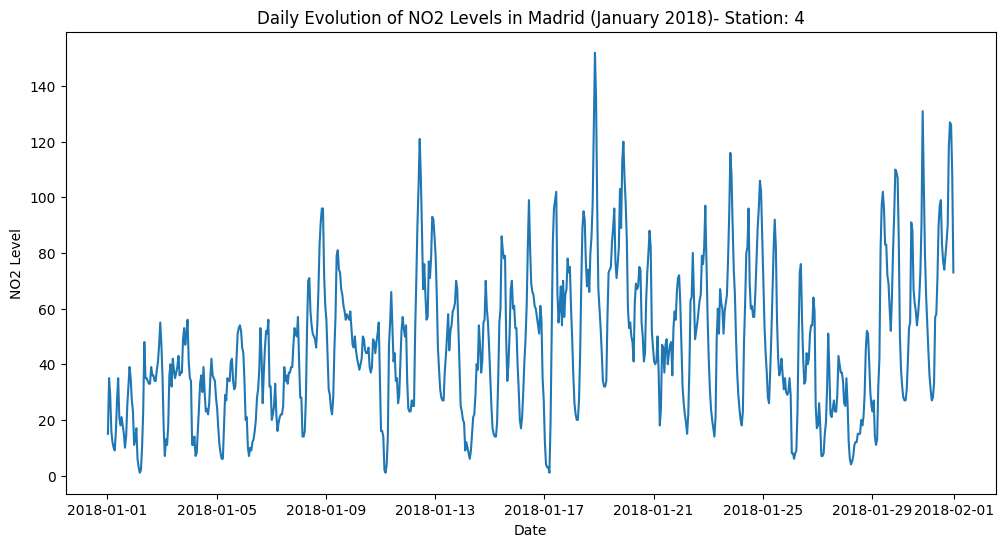

In [518]:
# Data Exploration
# Visualizing daily evolution
plt.figure(figsize=(12, 6))
sns.lineplot(x='FECHA', y='NO2_level', data=melted_df[melted_df['ESTACION']==4])
plt.title('Daily Evolution of NO2 Levels in Madrid (January 2018)- Station: 4')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.show()

In [ ]:
# Visualizing monthly evolution
df_no2_monthly = df_no2.resample('M', on='Date').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_no2_monthly.index, y='NO2_Level', data=df_no2_monthly)
plt.title('Monthly Average NO2 Levels in Madrid (2018)')
plt.xlabel('Month')
plt.ylabel('Average NO2 Level')
plt.show()

In [ ]:


# Exploring factors affecting NO2 levels
# (Assuming additional columns like 'Temperature', 'Weather', etc.)
# Add relevant exploration based on your actual dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='NO2_Level', data=df_no2, hue='Weather')
plt.title('Scatter Plot of NO2 Levels vs Temperature (2018)')
plt.xlabel('Temperature')
plt.ylabel('NO2 Level')
plt.legend(title='Weather')
plt.show()

In [ ]:

# Proposed Predictive Model
# (Provide detailed discussion and rationale, the following is a placeholder)
print("Proposed Predictive Model:")
print("Variables to introduce: Temperature, Season, Previous NO2 Levels")
print("Historical Data Depth: Consider using at least one year of historical data")
print("Modeling Techniques: Try linear regression, time series models, etc.")
